In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/farrukhahmed/Personal Folder/AI Engineer/projects/customer-churn-project/data/Churn_Modelling.csv")

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.drop("CustomerId", axis="columns",inplace=True)

In [10]:
df.drop(["Surname","RowNumber"], axis="columns", inplace=True)

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
customer_exited_no =  df[df.Exited== 0].Tenure
customer_exited_yes =  df[df.Exited== 1].Tenure

In [19]:
len(customer_exited_no)

7963

In [20]:
len(customer_exited_yes)

2037

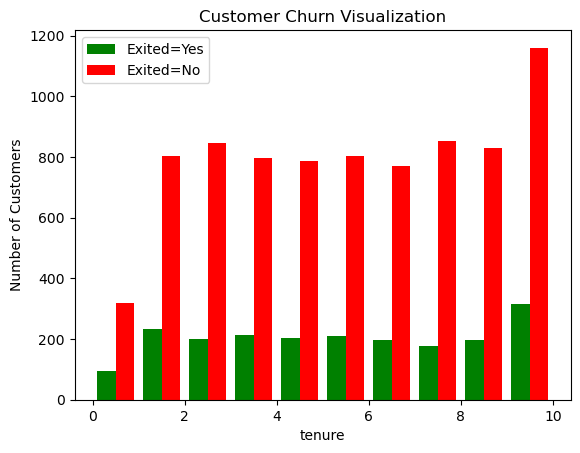

In [21]:
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Visualization")

plt.hist([customer_exited_yes, customer_exited_no], color=['green','red'], label=['Exited=Yes', 'Exited=No'])
plt.legend()

In [23]:
def print_unique_values(df):
    for col in df:
        if df[col].dtype == 'object':
            print(f'{col} : {df[col].unique()}')

In [24]:
print_unique_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [28]:
df1 = df
df1['Gender'].replace({'Female':1 , 'Male':0}, inplace=True)

/var/folders/f4/x3m6rlg53tqf2jrs4ys6xwxc0000gn/T/ipykernel_24236/4289279751.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'].replace({'Female':1 , 'Male':0}, inplace=True)


In [30]:
df1.head(100)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
95,515,Spain,0,35,10,176273.95,1,0,1,121277.78,0
96,773,Spain,0,41,9,102827.44,1,0,1,64595.25,0
97,814,Germany,0,29,8,97086.40,2,1,1,197276.13,0
98,710,Spain,0,22,8,0.00,2,0,0,99645.04,0


In [31]:
df2 = pd.get_dummies(df1, columns=['Geography'])

In [32]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [33]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [34]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [35]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
df3 = df2 

In [37]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,True,False,False
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,False,False,True
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,True,False,False
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,True,False,False
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,False,False,True


In [48]:
df3['EstimatedSalary'].isnull().any()

False

In [38]:
X = df3.drop('Exited', axis='columns')
Y = df3['Exited']

In [39]:
len(X)

10000

In [40]:
len(Y)

10000

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [43]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
2926,0.320,0,0.608108,0.8,0.000000,2,1,1,0.576456,True,False,False
4634,0.520,1,0.364865,0.3,0.000000,1,1,0,0.191345,False,False,True
416,0.274,1,0.581081,0.5,0.439892,1,0,0,0.056870,False,True,False
6369,0.592,1,0.270270,0.2,0.000000,2,0,0,0.893791,True,False,False
7952,0.792,1,0.202703,0.2,0.429928,2,1,1,0.730974,False,True,False
4066,0.946,1,0.351351,0.1,0.000000,2,0,1,0.912508,True,False,False
3018,0.476,1,0.121622,0.8,0.000000,1,1,0,0.100284,True,False,False
2543,1.000,1,0.081081,0.1,0.000000,2,0,1,0.345239,False,False,True
9685,0.486,0,0.364865,0.4,0.553313,1,0,0,0.054091,True,False,False
6291,0.426,0,0.081081,0.7,0.000000,2,0,0,0.081548,False,False,True


In [44]:
y_train[:10]

2926    0
4634    1
416     1
6369    0
7952    0
4066    0
3018    0
2543    0
9685    0
6291    0
Name: Exited, dtype: int64

In [49]:
X_train = X_train.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)

In [51]:
X_test = X_test.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

In [53]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
219/219 [==============================] - 0s 543us/step - loss: 0.5556 - accuracy: 0.7356
Epoch 2/1000
219/219 [==============================] - 0s 515us/step - loss: 0.4852 - accuracy: 0.7944
Epoch 3/1000
219/219 [==============================] - 0s 519us/step - loss: 0.4726 - accuracy: 0.7940
Epoch 4/1000
219/219 [==============================] - 0s 514us/step - loss: 0.4634 - accuracy: 0.7996
Epoch 5/1000
219/219 [==============================] - 0s 517us/step - loss: 0.4557 - accuracy: 0.8006
Epoch 6/1000
219/219 [==============================] - 0s 514us/step - loss: 0.4498 - accuracy: 0.8039
Epoch 7/1000
219/219 [==============================] - 0s 516us/step - loss: 0.4436 - accuracy: 0.8069
Epoch 8/1000
219/219 [==============================] - 0s 517us/step - loss: 0.4377 - accuracy: 0.8124
Epoch 9/1000
219/219 [==============================] - 0s 697us/step - loss: 0.4330 - accuracy: 0.8156
Epoch 10/1000
219/219 [==============================] - 0s 507u

In [54]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 487us/step - loss: 0.3398 - accuracy: 0.8547


[0.3398452699184418, 0.8546666502952576]

In [55]:
yp = model.predict(X_test)


94/94 [==============================] - 0s 1ms/step


In [56]:
yp

array([[0.02108784],
       [0.08482835],
       [0.0677129 ],
       ...,
       [0.01868346],
       [0.00555729],
       [0.06176413]], dtype=float32)

In [59]:
ypred = []
for ele in yp:
    if ele > 0.5:
        ypred.append(1)
    else:
        ypred.append(0)    

In [60]:
ypred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [61]:
ypred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [62]:
y_test[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1.], dtype=float32)